<a href="https://colab.research.google.com/github/vcho1958/opensource_foundation_project/blob/main/%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
import cv2
cv2.__version__

'4.1.2'

In [32]:
img = cv2.imread("/content/drive/Shareddrives/sample_data/sample.jpg")

가로: 714픽셀
세로: 946픽셀
채널: 3


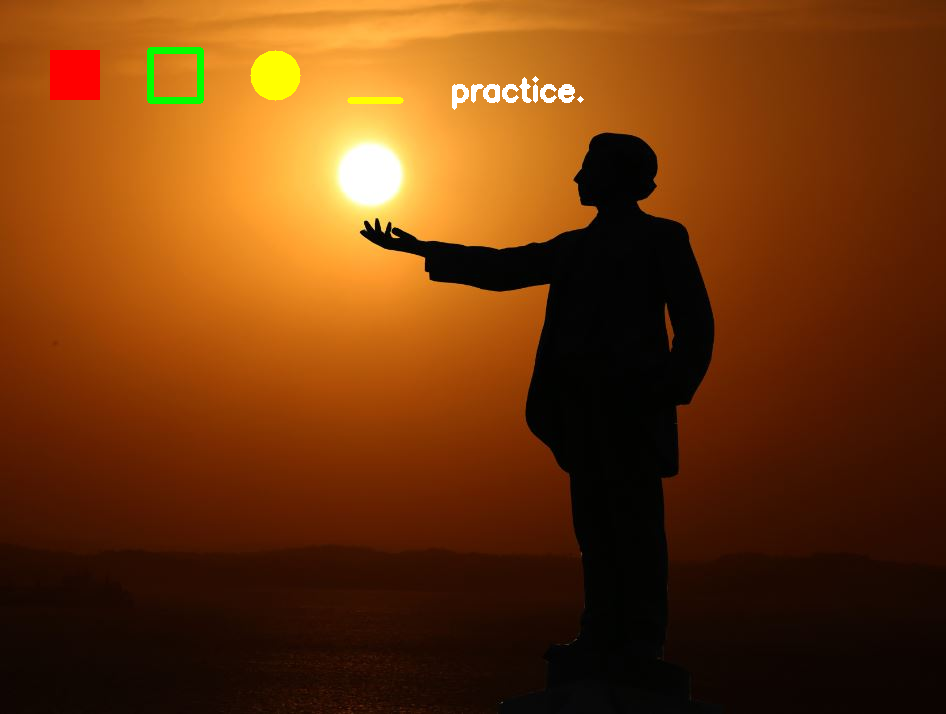

In [40]:
from google.colab.patches import cv2_imshow #colab에서 바로볼수 있도록 해주는 함수
(height, width) = img.shape[:2]
center = (width // 2, height // 2)
print(f"가로: {img.shape[0]}픽셀")
print(f"세로: {img.shape[1]}픽셀")
print(f"채널: {img.shape[2]}")#RGB면 3          RGBA면 4  [A는 투명도]
cv2_imshow(img)#colab에서 바로볼수 있도록 해주는 함수
#cv2.imshow("제목", img) # 파이참 용(이미지 확인 창)
#cv2.waitkey(0) #파이참 용 (아무키나입력할때까지 대기)
#cv2.destroyAllWindows() #파이참 용 (cv2로 인해 열린창 모두 닫기)

In [34]:
(b,g,r) = img[0,0]
print(f"픽셀정보 (0,0) R:{r}, G:{g}, B: {b}")

픽셀정보 (0,0) R:148, G:69, B: 10


(714, 946, 3)


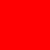

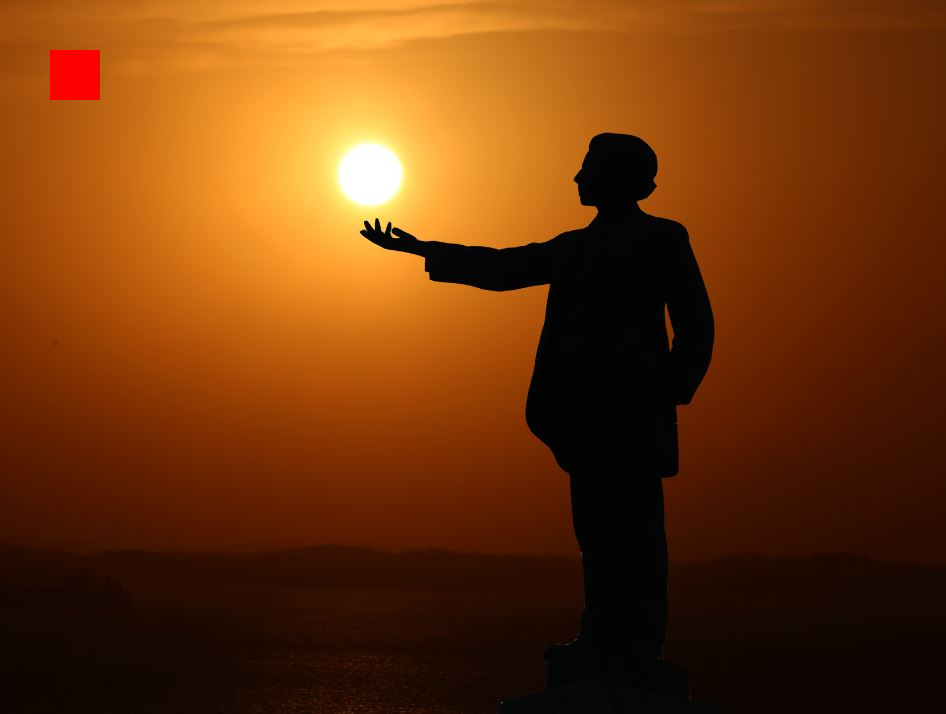

In [35]:
print(img.shape)
dot = img[50:100, 50:100] 
#첫번째 인덱스(556)가 50~100인 데이터와 
#두번째 인덱스(640)가 50~100인 데이터를 슬라이싱해서 
#dot에 저장(복사가 아니라 해당영역 주소값만 가져옴)
img[50:100, 50:100] = (0,0,255) #해당주소 데이터(색) 변경
cv2_imshow(dot) 
#img의 값만 수정했지만 주소를 복사해오는 개념이기 때문에 
#dot도 마찬가지로 변경돼서 보여진다.
cv2_imshow(img)
#cv2.imshow("제목", img) # 파이참 용(이미지 확인 창)
#cv2.waitkey(0) #파이참 용 (아무키나입력할때까지 대기)
#cv2.destroyAllWindows() #파이참 용 (cv2로 인해 열린창 모두 닫기)

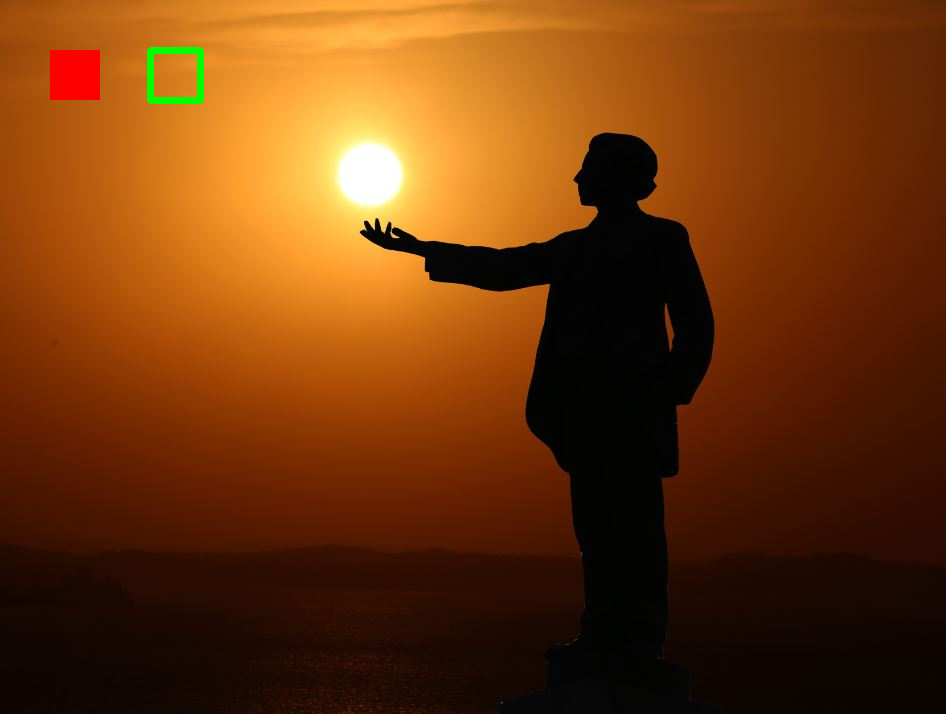

In [36]:
cv2.rectangle(img, (150,50),(200,100),(0,255,0), 5)
#순서대로 사각형의 좌상단 우하단의 꼭짓점 위치, 색(RGB), 굵기(픽셀, -1은 채우기)
cv2_imshow(img)
#cv2.imshow("제목", img) # 파이참 용(이미지 확인 창)
#cv2.waitkey(0) #파이참 용 (아무키나입력할때까지 대기)
#cv2.destroyAllWindows() #파이참 용 (cv2로 인해 열린창 모두 닫기)

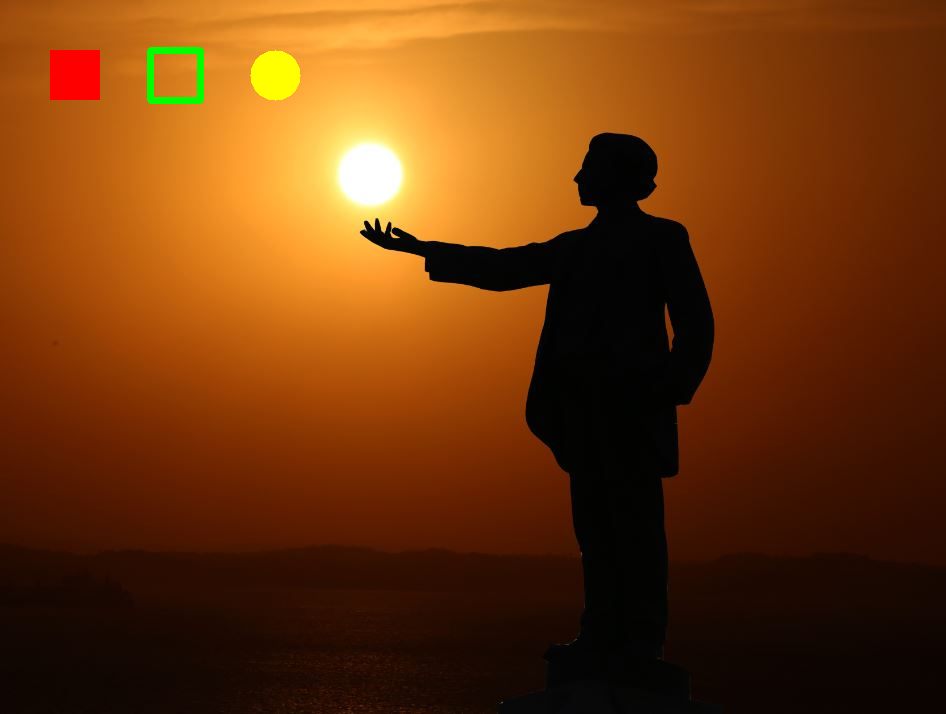

In [37]:
cv2.circle(img, (275,75),25,(0,255,255), -1)
#순서대로 원 중심의 위치, 반지름(픽셀), 색(RGB), 두께(픽셀, -1은 채우기)
cv2_imshow(img)
#cv2.imshow("제목", img) # 파이참 용(이미지 확인 창)
#cv2.waitkey(0) #파이참 용 (아무키나입력할때까지 대기)
#cv2.destroyAllWindows() #파이참 용 (cv2로 인해 열린창 모두 닫기)

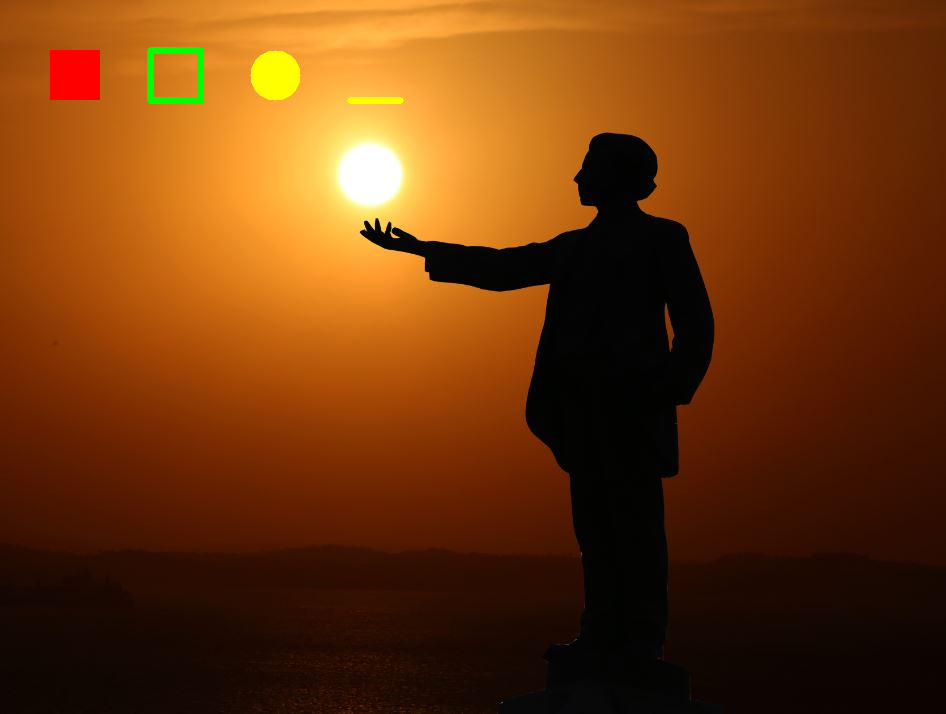

In [38]:
cv2.line(img, (350,100),(400, 100),(0,255,255), 5)
#시작점 끝점 색 굵기
cv2_imshow(img)
#cv2.imshow("제목", img) # 파이참 용(이미지 확인 창)
#cv2.waitkey(0) #파이참 용 (아무키나입력할때까지 대기)
#cv2.destroyAllWindows() #파이참 용 (cv2로 인해 열린창 모두 닫기)

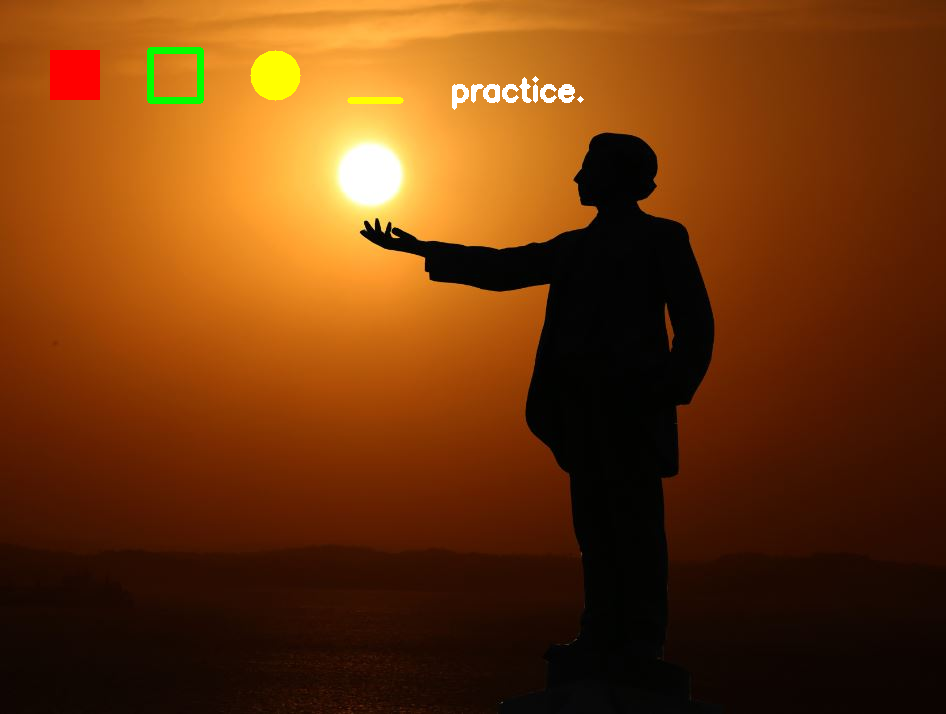

In [39]:
cv2.putText(img, 'practice.', (450,100), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 4)
#순서대로 폰트박스 좌하단, 폰트(기본제공폰트는 한글 지원x), 크기(지정크기임), 색(RGB), 굵기(픽셀)

cv2_imshow(img)
#cv2.imshow("제목", img) # 파이참 용(이미지 확인 창)
#cv2.waitkey(0) #파이참 용 (아무키나입력할때까지 대기)
#cv2.destroyAllWindows() #파이참 용 (cv2로 인해 열린창 모두 닫기)

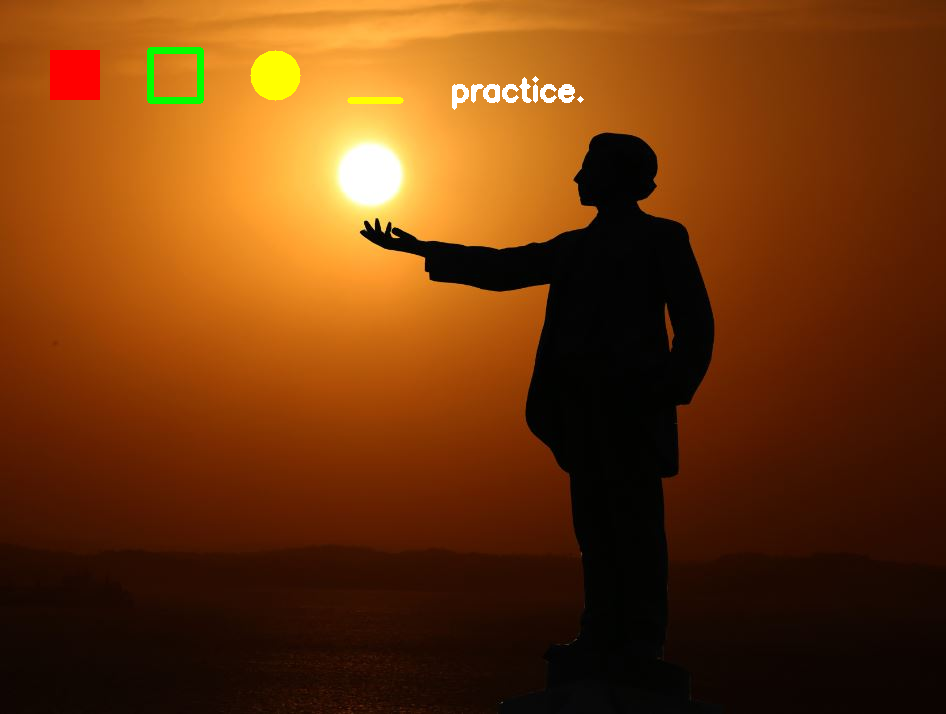

In [41]:
import numpy as np #c언어 배열처럼 자료형 지정가능한 배열을 제공해주는 모듈
move = np.float32([[1,0,100],[0,1,100]]) #32비트체계의 float형 배열(4byte)
# [1,0,100] 맨처음 인덱스만 1일때 상하로만 조절을 의미 3번째 인덱스는 이동량(픽셀) 
# [0,1,100] 좌우로 이동 그러나 cv2.imshow메소드에서만 동작하기 때문에
# colab에서는 적용안됨 포토샵에서 전체선택 후 드래그한 것처럼 움직임
# 이동량은 +면 아래, 우측 -면 위, 좌측 으로 이동함
# 그냥 이미지화면에서 이미지 시작점(좌상단)을 어디로 할껀지 정한다고 이해해도 됨
moved = cv2.warpAffine(img, move, (width, height))
cv2_imshow(img)
#cv2.imshow("제목", img) # 파이참 용(이미지 확인 창)
#cv2.waitkey(0) #파이참 용 (아무키나입력할때까지 대기)
#cv2.destroyAllWindows() #파이참 용 (cv2로 인해 열린창 모두 닫기)

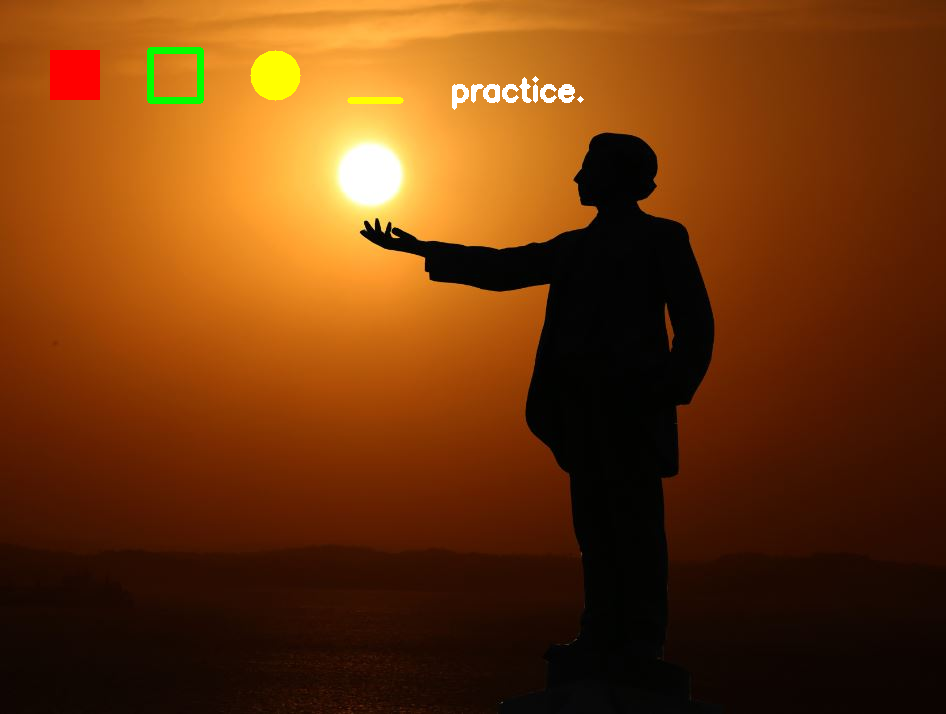

In [42]:
#회전 시키기
move = cv2.getRotationMatrix2D(center, 90, 1.0)
#차례대로 회전의 중심, 각도(+반시계 -시계), 배율(크기)
rotated = cv2.warpAffine(img, move, (width,height))
# warpAffine 메소드는 colab에서는 적용안됨
cv2_imshow(img)
#cv2.imshow("제목", img) # 파이참 용(이미지 확인 창)
#cv2.waitkey(0) #파이참 용 (아무키나입력할때까지 대기)
#cv2.destroyAllWindows() #파이참 용 (cv2로 인해 열린창 모두 닫기)

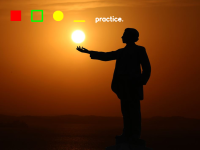

In [43]:
#비율 조정
ratio = 200.0 / width
#비율 : 최대 가로픽셀이 200일 때 줄여지는 비율
dimension = (200, int(height * ratio))
#최대 가로픽셀은 200, 최대 세로픽셀은 기존 세로값*가로픽셀이 줄여진 비율
resized = cv2.resize(img, dimension, interpolation = cv2.INTER_AREA)
#순서대로 이미지, 최대크기, 보간법
#보간법별 차이점은 https://gist.github.com/georgeblck/e3e0274d725c858ba98b1c36c14e2835
# 위 링크에 나와있음 대강 축소 또는 확대 시 몇픽셀끼리 뭉칠건지(모자이크처리와 비슷) 규칙을 정해줌
# 이미지셋 마다 맨 왼쪽이 원본 오른쪽으로 갈 수록 아래 보간법을 순서대로 사용한 것
# cv2.INTER_AREA  cv2.INTER_NEAREST  cv2.INTER_LINEAR  cv2.INTER_CUBIC cv2.INTER_LANCZOS4)]
# upsampling은 사진 확대 down sampling은 축소시 발생되는 모습
cv2_imshow(resized)
#cv2.imshow("제목", img) # 파이참 용(이미지 확인 창)
#cv2.waitkey(0) #파이참 용 (아무키나입력할때까지 대기)
#cv2.destroyAllWindows() #파이참 용 (cv2로 인해 열린창 모두 닫기)

In [ ]:
#뒤집기 코랩에서 실습 불가
flipped = cv2.flip(img, 1)
#1 = 좌우대칭 0=상하대칭 -1=좌우대칭 후 상하대칭
#cv2.imshow("제목", img, fliped) # 파이참 용(이미지 확인 창)
#cv2.waitkey(0) #파이참 용 (아무키나입력할때까지 대기)
#cv2.destroyAllWindows() #파이참 용 (cv2로 인해 열린창 모두 닫기)

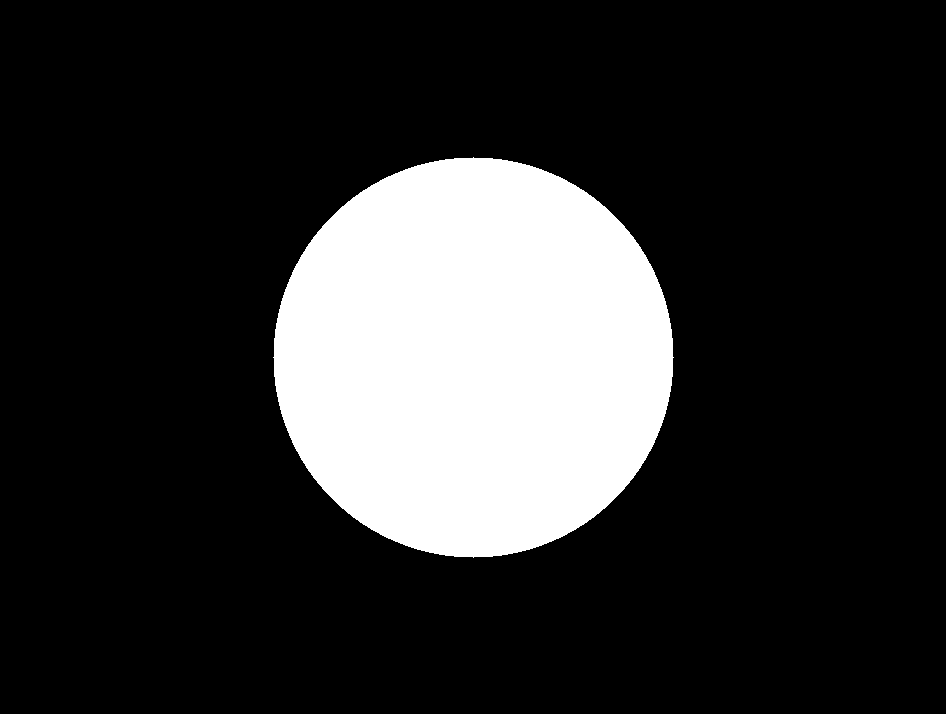

In [44]:
#마스킹 : 사진에 특정 요소를 위에 덮음
mask = np.zeros(img.shape[:2], dtype = "uint8")
#np.zeros:0으로만 이루어진 배열선언 첫번째 인자 튜플(배열의 형태 및 크기)
#dtype = uint8:unsigned int 8byte
cv2.circle(mask, center, 200, (255,255,255), -1)
cv2_imshow(mask)
#cv2.imshow("제목", mask) # 파이참 용(이미지 확인 창)
#cv2.waitkey(0) #파이참 용 (아무키나입력할때까지 대기)
#cv2.destroyAllWindows() #파이참 용 (cv2로 인해 열린창 모두 닫기)

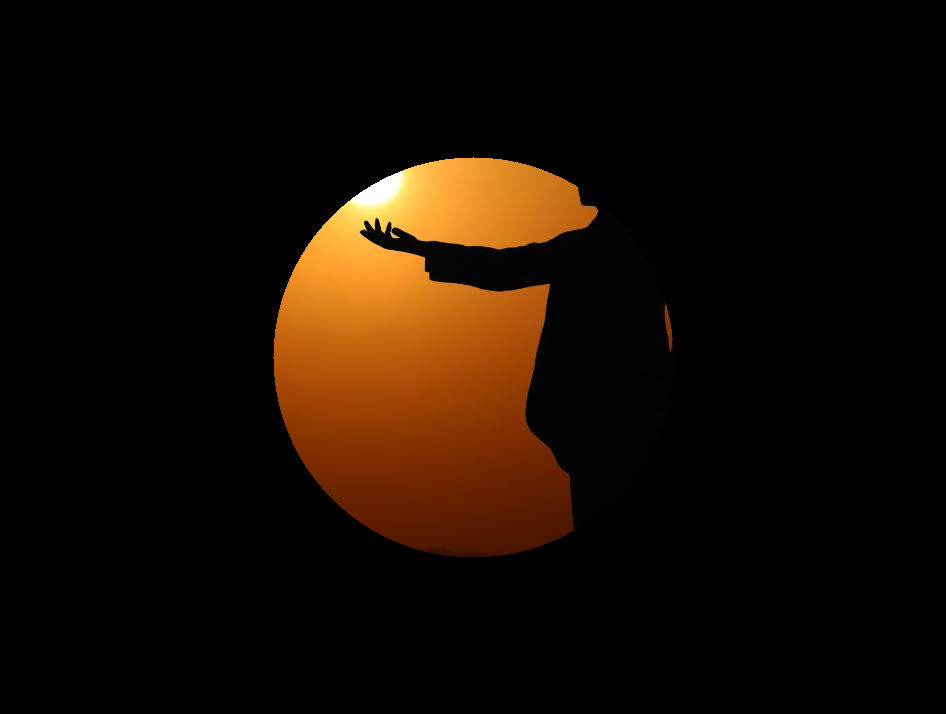

In [46]:
masked = cv2.bitwise_and(img, img, mask = mask) 
#파워포인트 교집합 기능 생각하면 됩니다. mask는 옵션입니다.
#각 픽셀별로 비트별로 비교를 해서 1인 비트만 남기는데
#ex) 비교 픽셀 두개가(4,8,12) (6,12,4)일 경우
# (0100,1000,1100) (0110,1100,0100)이므로 비트연산을하면
# (0100,1000,0100) 이렇게 교체되고 거기에 mask옵션이 있으면 mask의 픽셀도 마찬가지로 연산함
#이 때 mask도 함께 비트연산을 하기 때문에
#mask가 11111111인 255,255,255인 부분만 저렇게 남게 되고 나머지는
#img 두개가 같아서 그대로 출력되어야하지만 mask에서 0으로 채워져있기 때문에
#0으로 출력되어 검정색이됩니다. 네트워크에서 서브넷 마스크 개념과 비슷함
#mask를 (255,0,0)이런식으로 해서 특정부분만 빨간계열만 남기는 필터도 만들 수 있습니다.
cv2_imshow(masked)
#cv2.imshow("제목", masked) # 파이참 용(이미지 확인 창)
#cv2.waitkey(0) #파이참 용 (아무키나입력할때까지 대기)
#cv2.destroyAllWindows() #파이참 용 (cv2로 인해 열린창 모두 닫기)

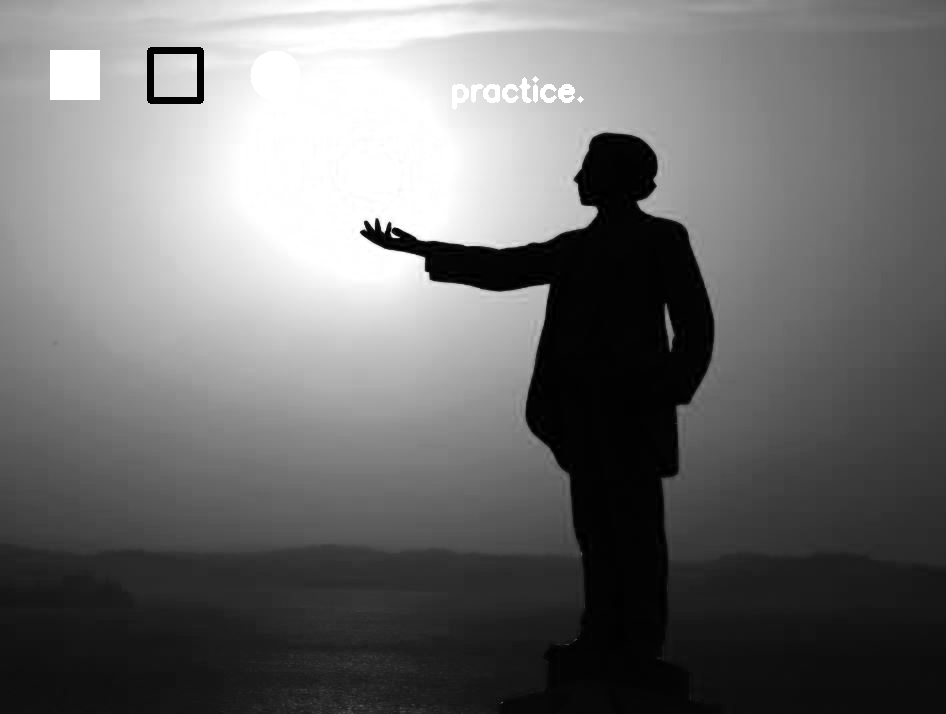

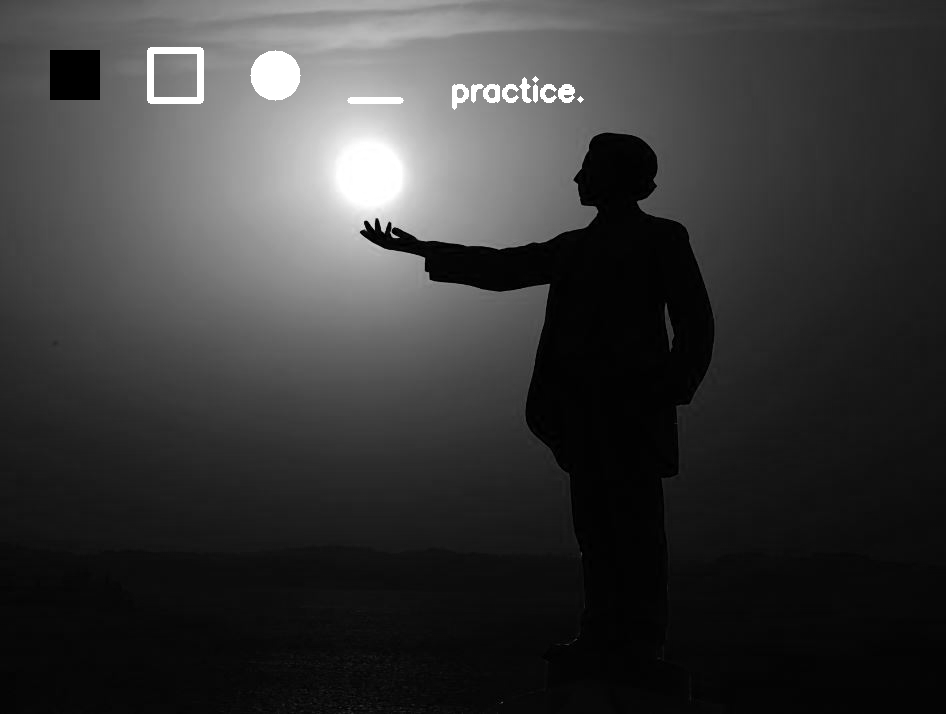

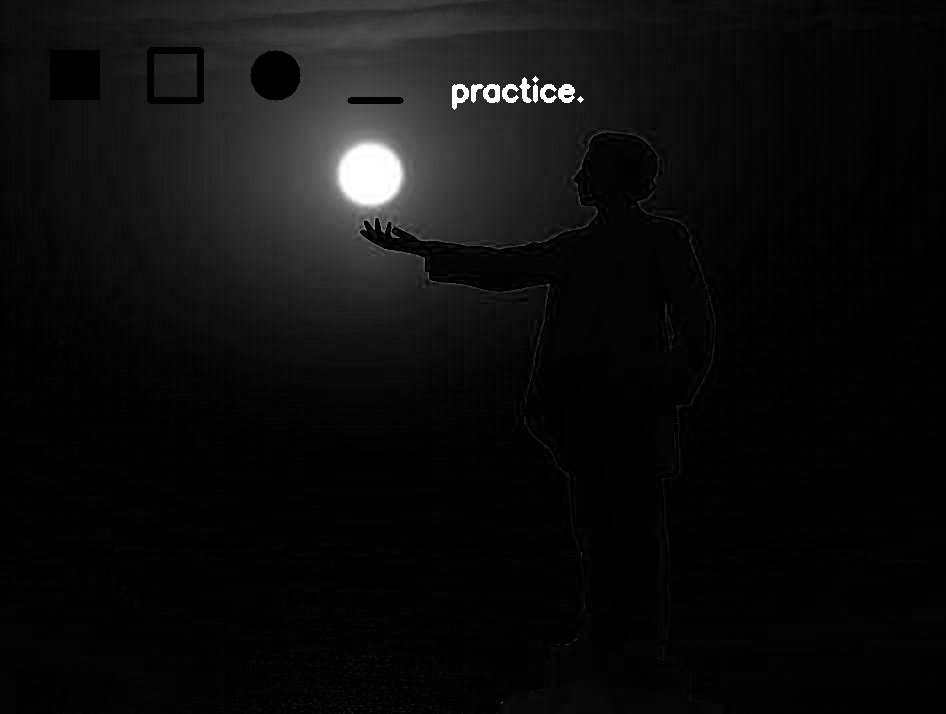

In [47]:
#RGB채널
(Blue, Green, Red) = cv2.split(img)
cv2_imshow(Red)
cv2_imshow(Green)
cv2_imshow(Blue)
#RGB값 별로 나머지 채널은 같은값으로 덮어씌운 것과 같은 효과(나머지 부분은 split으로 절삭되기 때문)
#ex) (128,131,142)이면 (128,128,128)로 변환한 것과 같은 효과
#따라서 각 색에 해당하는 부분이 흰색으로 나오게 됨

#cv2.imshow("Red", Red) # 파이참 용(이미지 확인 창)
#cv2.imshow("Green", Green) # 파이참 용(이미지 확인 창)
#cv2.imshow("Blue", Blue) # 파이참 용(이미지 확인 창)
#cv2.waitkey(0) #파이참 용 (아무키나입력할때까지 대기)
#cv2.destroyAllWindows() #파이참 용 (cv2로 인해 열린창 모두 닫기)

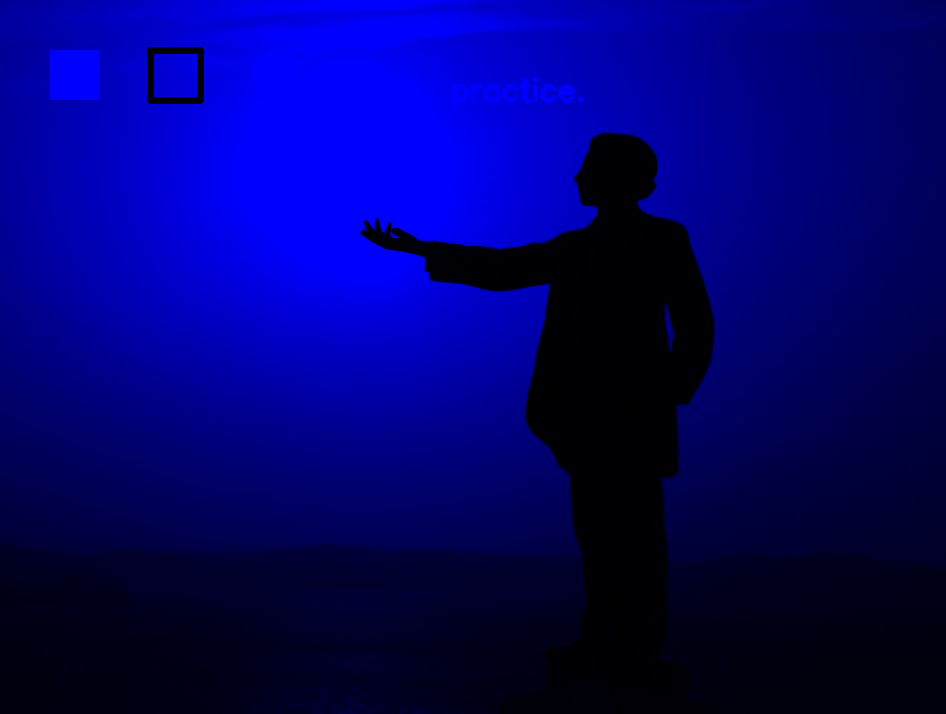

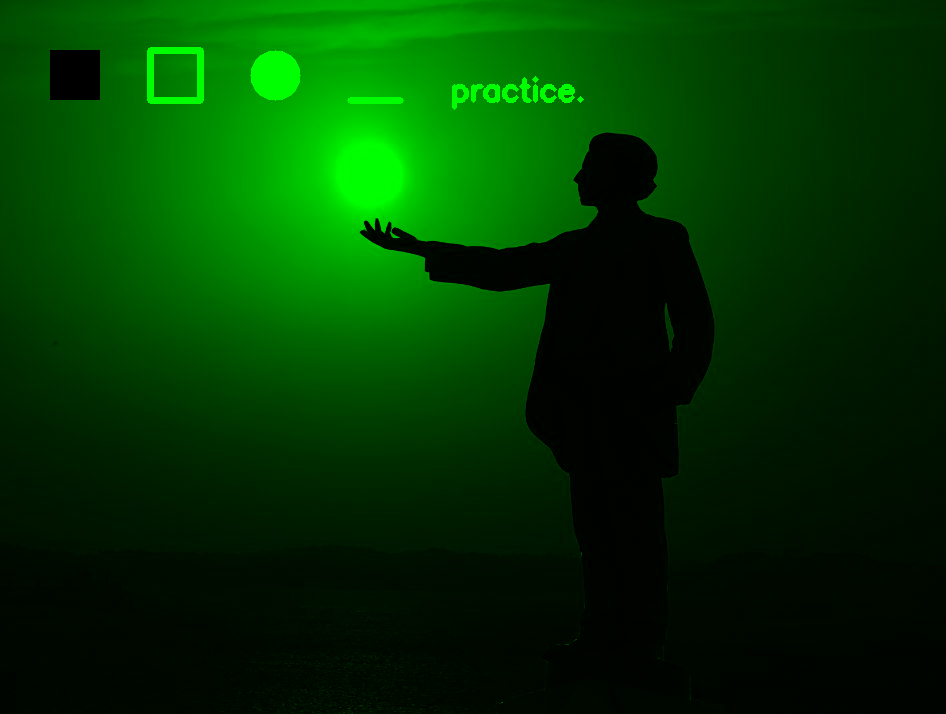

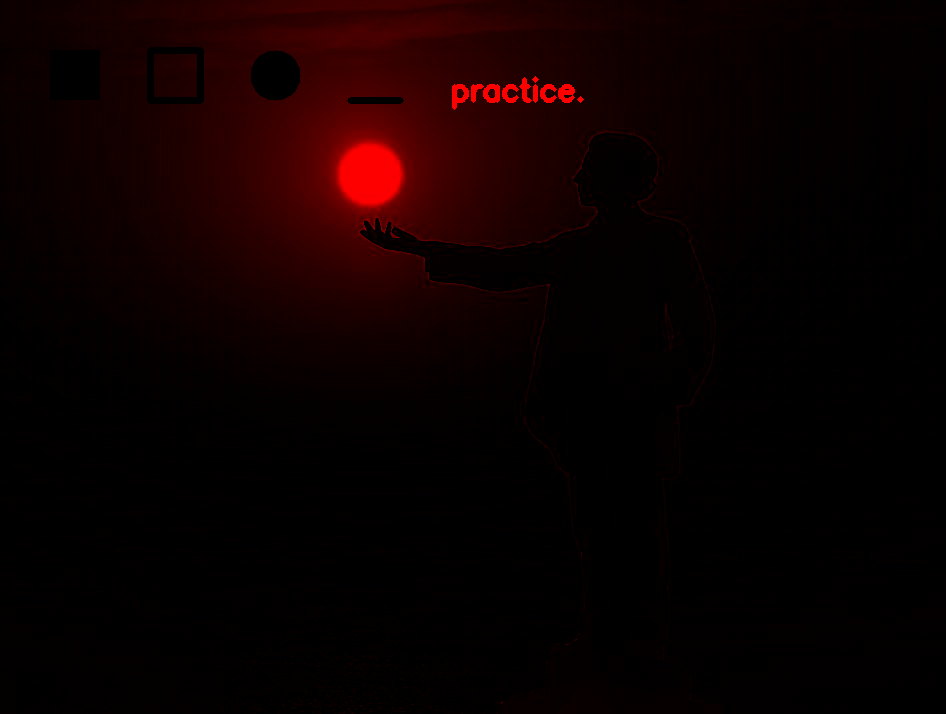

In [49]:
zeros = np.zeros(img.shape[:2], dtype = "uint8")

cv2_imshow(cv2.merge([Red,zeros,zeros]))
cv2_imshow(cv2.merge([zeros,Green,zeros]))
cv2_imshow(cv2.merge([zeros,zeros,Blue]))
#split으로 절삭된 데이터를 0으로 채워진 배열과 합치면써
#기존에 한가지색값의 수치로 모두 통일된 것과 같은 효과가
#나머지 색은 0으로 채워져서 선택된 색깔만 필터링돼서 보여주는 효과로 전환됨


#cv2.imshow("Red", cv2.merge([Red,zeros,zeros])) # 파이참 용(이미지 확인 창)
#cv2.imshow("Green", cv2.merge([zeros,Green,zeros])) # 파이참 용(이미지 확인 창)
#cv2.imshow("Blue", cv2.merge([zeros,zeros,Blue])) # 파이참 용(이미지 확인 창)
#cv2.waitkey(0) #파이참 용 (아무키나입력할때까지 대기)
#cv2.destroyAllWindows() #파이참 용 (cv2로 인해 열린창 모두 닫기)

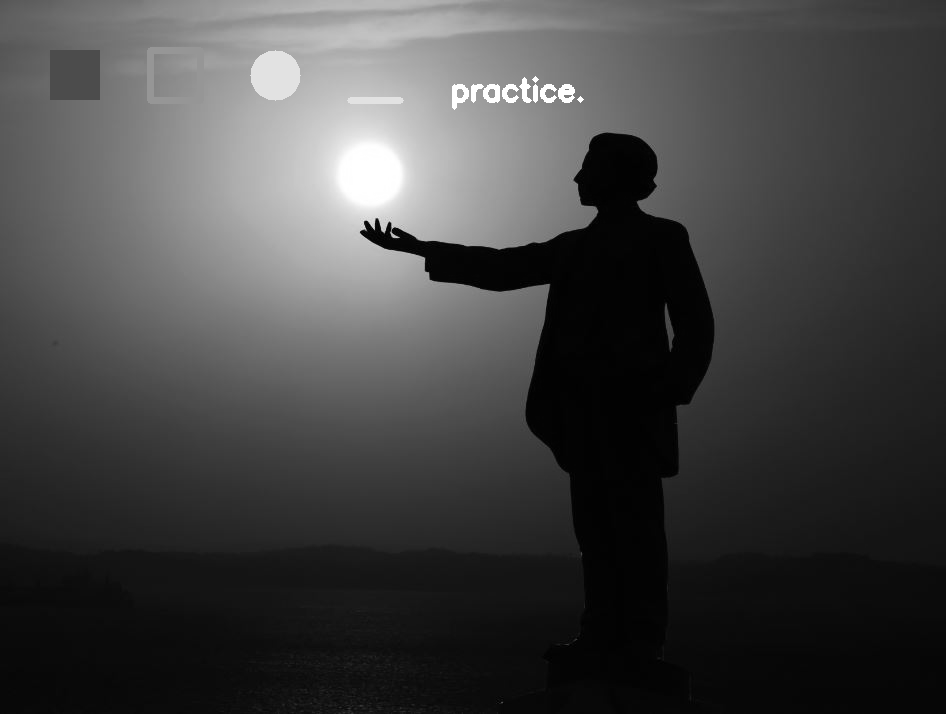

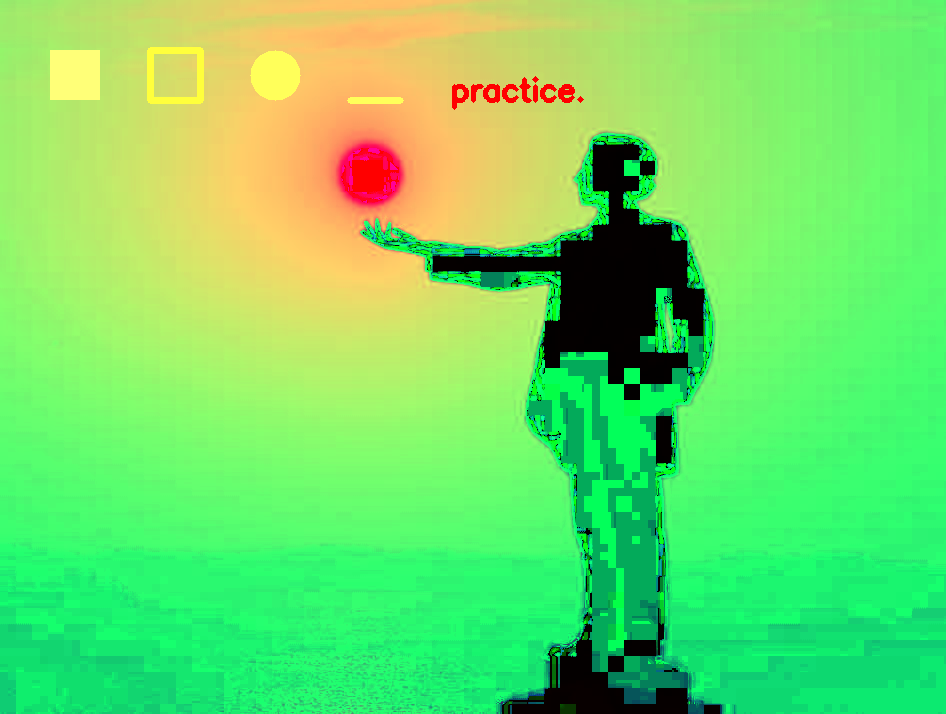

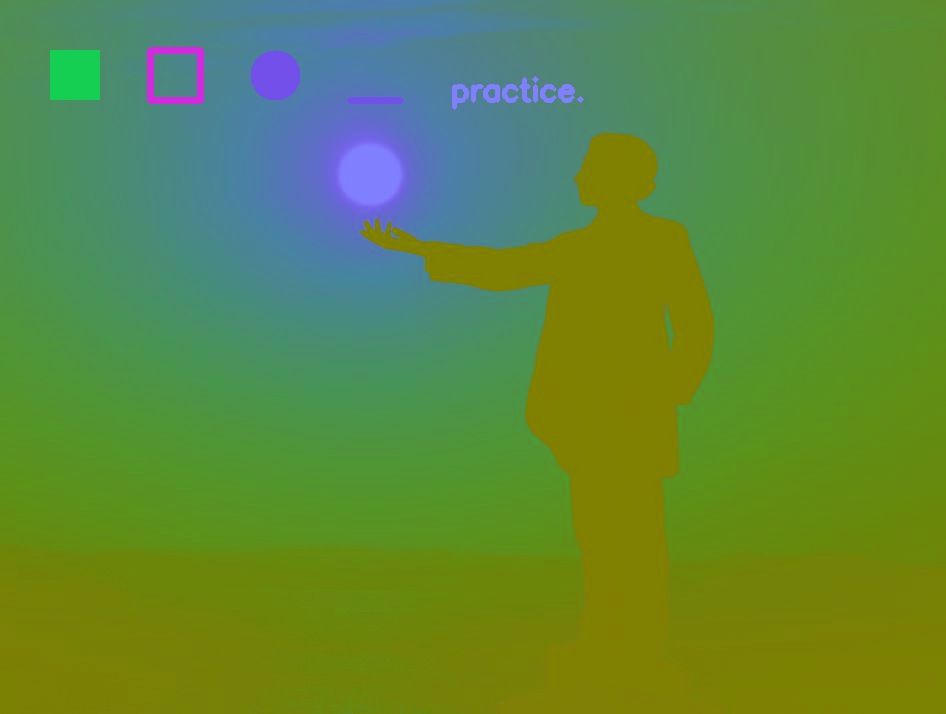

In [52]:
#기본제공 필터
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#흑백
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#미술작품 처럼(팝아트)
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
#사람이 보기에 직관적으로 전달된다는데 뭔소린지 모르겠어요

#RGB가 아니라 BGR인 이유는 옛날 카메라 시절 필름은 색상입힐때
# BGR순서로 했다고 함 그래서 openCV도 내장함수에서 불러올때 저순서대로 불러온대요
#RGB2함수도 있긴한데 색반전되는 효과를 줄 수 있네요

cv2_imshow(gray)
cv2_imshow(hsv)
cv2_imshow(lab)
#사진 너무 한가지색만 있어서 이상하게 나오네요 죄송해요 ㅠㅠ
#cv2.imshow("gray", gray) # 파이참 용(이미지 확인 창)
#cv2.imshow("hsv", hsv) # 파이참 용(이미지 확인 창)
#cv2.imshow("lab", lab)) # 파이참 용(이미지 확인 창)
#cv2.waitkey(0) #파이참 용 (아무키나입력할때까지 대기)
#cv2.destroyAllWindows() #파이참 용 (cv2로 인해 열린창 모두 닫기)
